In [469]:
import pandas as pd
import json 
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

In [470]:
nodes = json.load(open('./node_list.json', 'rb'))
edges = json.load(open('./edge_list.json', 'rb'))

In [471]:
DirectG = nx.DiGraph()

In [472]:
# NODE Colors
color_mapping= {
    "Mondstadt" : "#aff8db",
    "Liyue": "#ffcbc1",
    "Inazuma" : "#d5aaff",
    "Snezhnaya": "#ace7ff", 
    "Sumeru" : "#A9B388",
    "Fontaine" : "#008CFF"
}

In [473]:
[DirectG.add_node(node["id"], nation=node["nation"]) for node in nodes];

In [474]:
[DirectG.add_edge(edge['From'], edge['to'], type=edge['type']) for edge in edges];

In [475]:
# Handle None values in node_colors list by assigning a default color
default_color = "#d1d1d1"
node_colors = [color_mapping.get(n[1].get("nation", default_color)) for n in list(DirectG.nodes(data=True))]
node_colors = [color if color is not None else default_color for color in node_colors]

In [476]:
# position, so nodes in draw take on same positions, generally
pos = nx.spring_layout(DirectG, k=0.25, iterations=25)

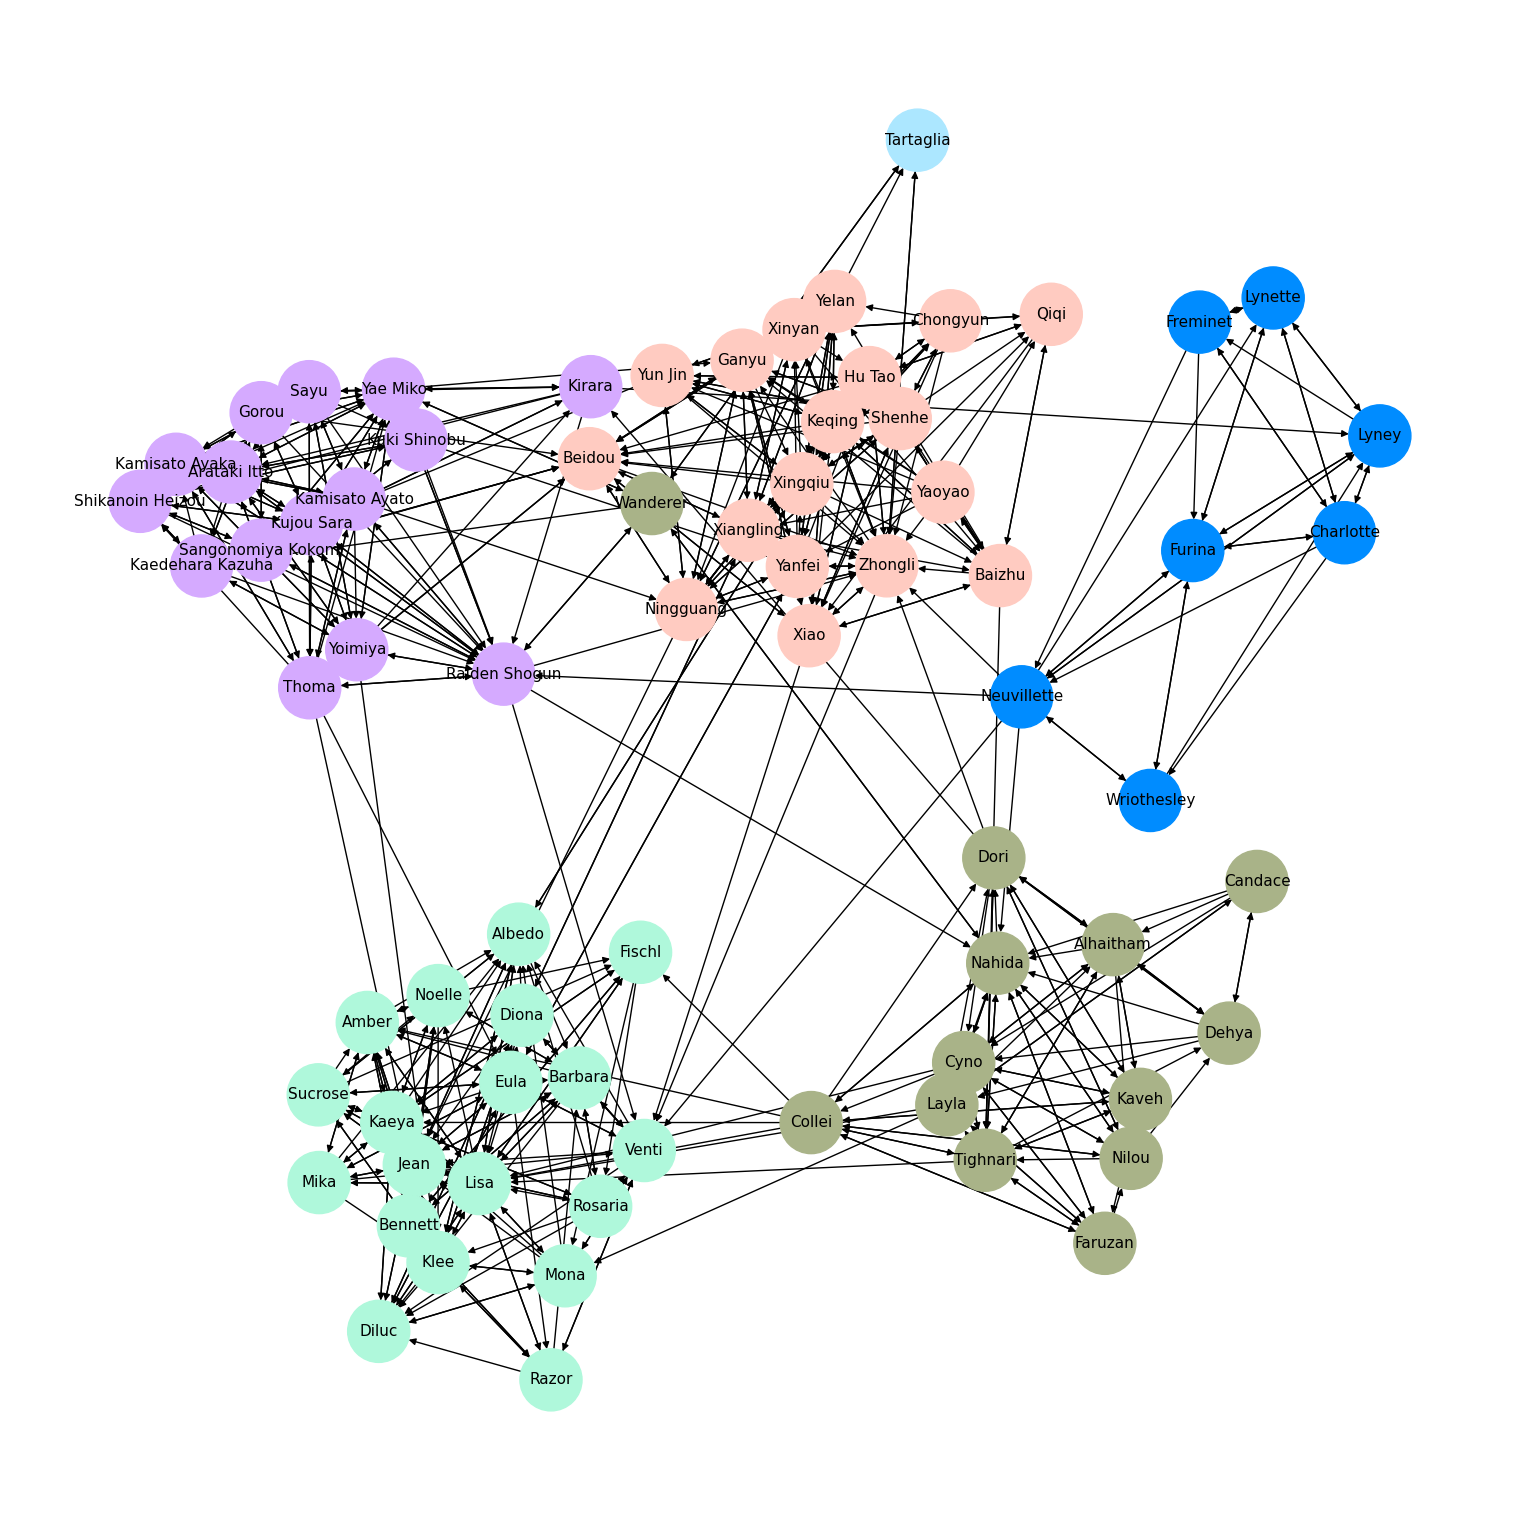

In [477]:
# directed graph
plt.figure(1,figsize=(15,15)) 
nx.draw(DirectG, 
        nodelist=DirectG.nodes,
        pos = pos,
        node_size=2000,
        node_color=node_colors,
        with_labels=True,
        font_size = 11,
        font_color='black')

# uncomment next line to save drawing as an image
# plt.savefig('directed.png')

plt.show()

In [478]:
DirectG.number_of_nodes()

73

In [479]:
DirectG.number_of_edges()

603

In [480]:
dir_nodes_df = pd.DataFrame(data=nodes, columns=['id', 'nation'])
dir_nodes_df['in_degree'] = dir_nodes_df['id'].apply(lambda n: DirectG.in_degree(n))
dir_nodes_df.sort_values('in_degree', ascending=False).head(70)
#higher indegree = mentioned the most

,id,nation,in_degree
51,Lisa,Mondstadt,19
57,Jean,Mondstadt,18
25,Zhongli,Liyue,18
9,Raiden...,Inazuma,16
30,Beidou,Liyue,15
42,Klee,Mondstadt,14
40,Kaeya,Mondstadt,14
10,Yae Miko,Inazuma,14
67,Nahida,Sumeru,13
28,Ningguang,Liyue,13


In [481]:
# average in-degree
dir_nodes_df['in_degree'].mean()

8.26027397260274

In [482]:
dir_nodes_df['out_degree'] = dir_nodes_df['id'].apply(lambda n: DirectG.out_degree(n))
dir_nodes_df.sort_values('out_degree', ascending=False).head(30)
# out degree= measure how many characters a particular character knows.

,id,nation,in_degree,out_degree
51,Lisa,Mondstadt,19,13
29,Xingqiu,Liyue,10,13
10,Yae Miko,Inazuma,14,13
40,Kaeya,Mondstadt,14,12
57,Jean,Mondstadt,18,12
23,Keqing,Liyue,9,12
45,Eula,Mondstadt,8,12
32,Hu Tao,Liyue,11,12
18,Thoma,Inazuma,7,12
9,Raiden...,Inazuma,16,12


In [483]:
# average out-degree
dir_nodes_df['out_degree'].mean()

8.26027397260274

C:\Users\tiffa\AppData\Local\Temp\ipykernel_13488\3062997739.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='in_degree', data=dir_nodes_df, palette='mako', ax=ax[0])
C:\Users\tiffa\AppData\Local\Temp\ipykernel_13488\3062997739.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='out_degree', data=dir_nodes_df, palette='mako', ax=ax[1])


<Axes: xlabel='out_degree', ylabel='count'>

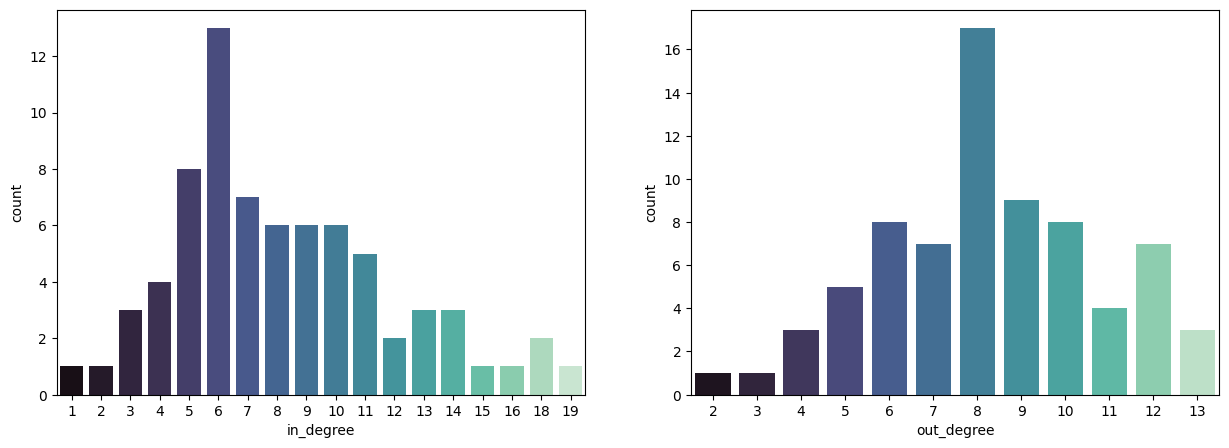

In [484]:
fig, ax = plt.subplots(1,2, figsize=(15, 5))
sns.countplot(x='in_degree', data=dir_nodes_df, palette='mako', ax=ax[0])
sns.countplot(x='out_degree', data=dir_nodes_df, palette='mako', ax=ax[1])

In [485]:
# calculate page rank centrality
pr = nx.pagerank(DirectG)

dir_nodes_df['page_rank'] = dir_nodes_df['id'].apply(lambda n: pr[n])
dir_nodes_df[['id', 'nation', 'page_rank']].sort_values('page_rank', ascending=False).head(10)

,id,nation,page_rank
51,Lisa,Mondstadt,0.034990
57,Jean,Mondstadt,0.034964
42,Klee,Mondstadt,0.027032
40,Kaeya,Mondstadt,0.027006
25,Zhongli,Liyue,0.026166
46,Albedo,Mondstadt,0.022881
44,Diluc,Mondstadt,0.022087
47,Amber,Mondstadt,0.021435
48,Barbara,Mondstadt,0.021013
28,Ningguang,Liyue,0.020205


In [486]:
# setting up undirected graph
Graph = DirectG.to_undirected(reciprocal=True)

In [487]:
# position, so nodes in draw take on same positions, generally
pos = nx.spring_layout(Graph, k=0.25, iterations=25)
node_colors = [color_mapping[node[1]['nation']] if node[1]['nation']in color_mapping.keys() else '#d1d1d1' for node in list(Graph.nodes(data=True)) ]

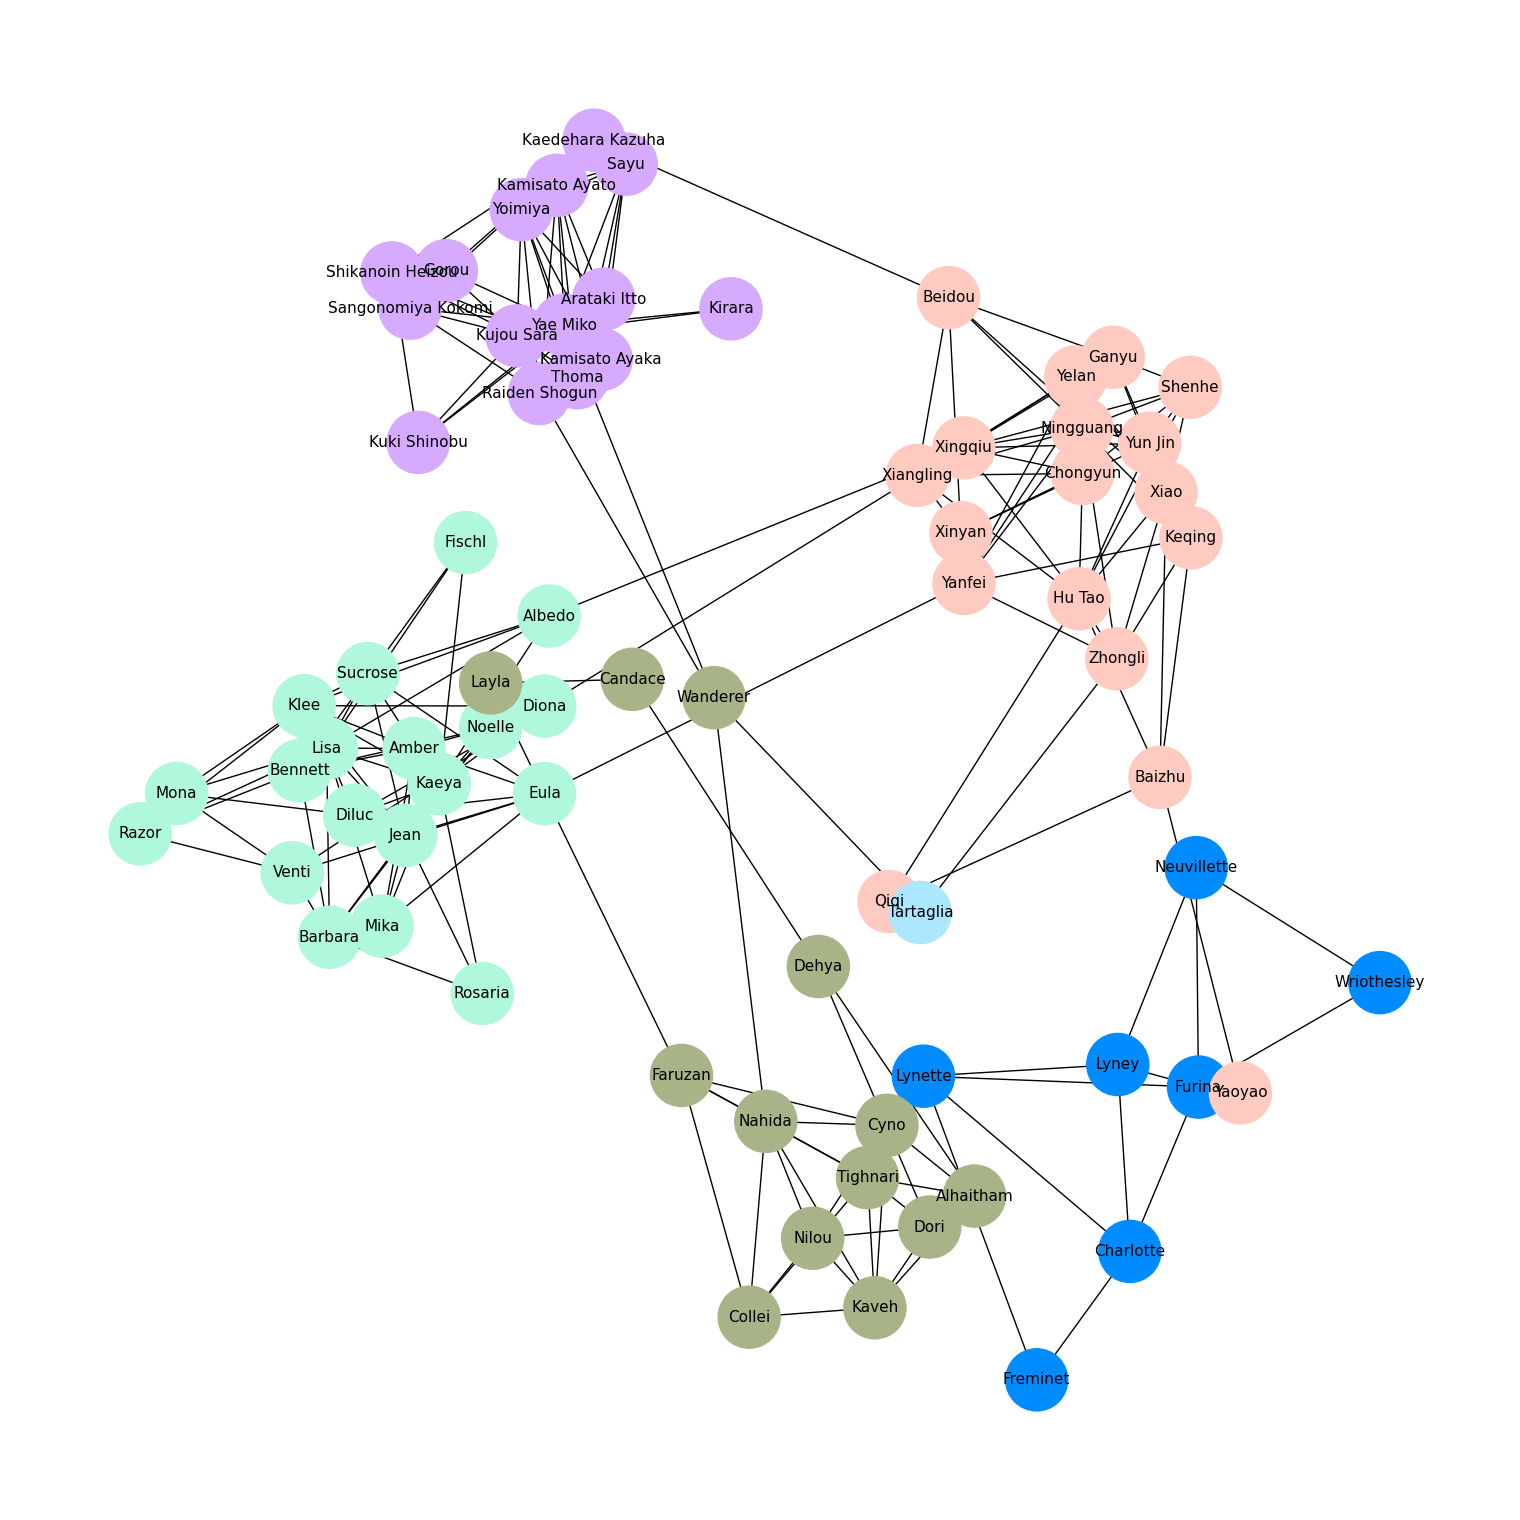

In [488]:
# undirected graph
plt.figure(1,figsize=(15,15)) 
nx.draw(Graph, 
        nodelist=Graph.nodes,
        pos = pos,
        node_size = 2000,
        node_color = node_colors,
        with_labels = True,
        font_size = 11,
        font_color = 'black')

# uncomment next line to save drawing as an image
# plt.savefig("undir_0.png", format="PNG")
plt.show()

In [489]:
# remove isolates from undirected graph
isolates = list(nx.isolates(Graph))
Graph.remove_nodes_from(isolates)

In [490]:
# position, so nodes in draw take on same positions, generally
pos = nx.spring_layout(Graph, k=0.25, iterations=20)

# recolor nodes
node_colors = [color_mapping[node[1]['nation']] if node[1]['nation']in color_mapping.keys() else '#d1d1d1' for node in list(Graph.nodes(data=True)) ]

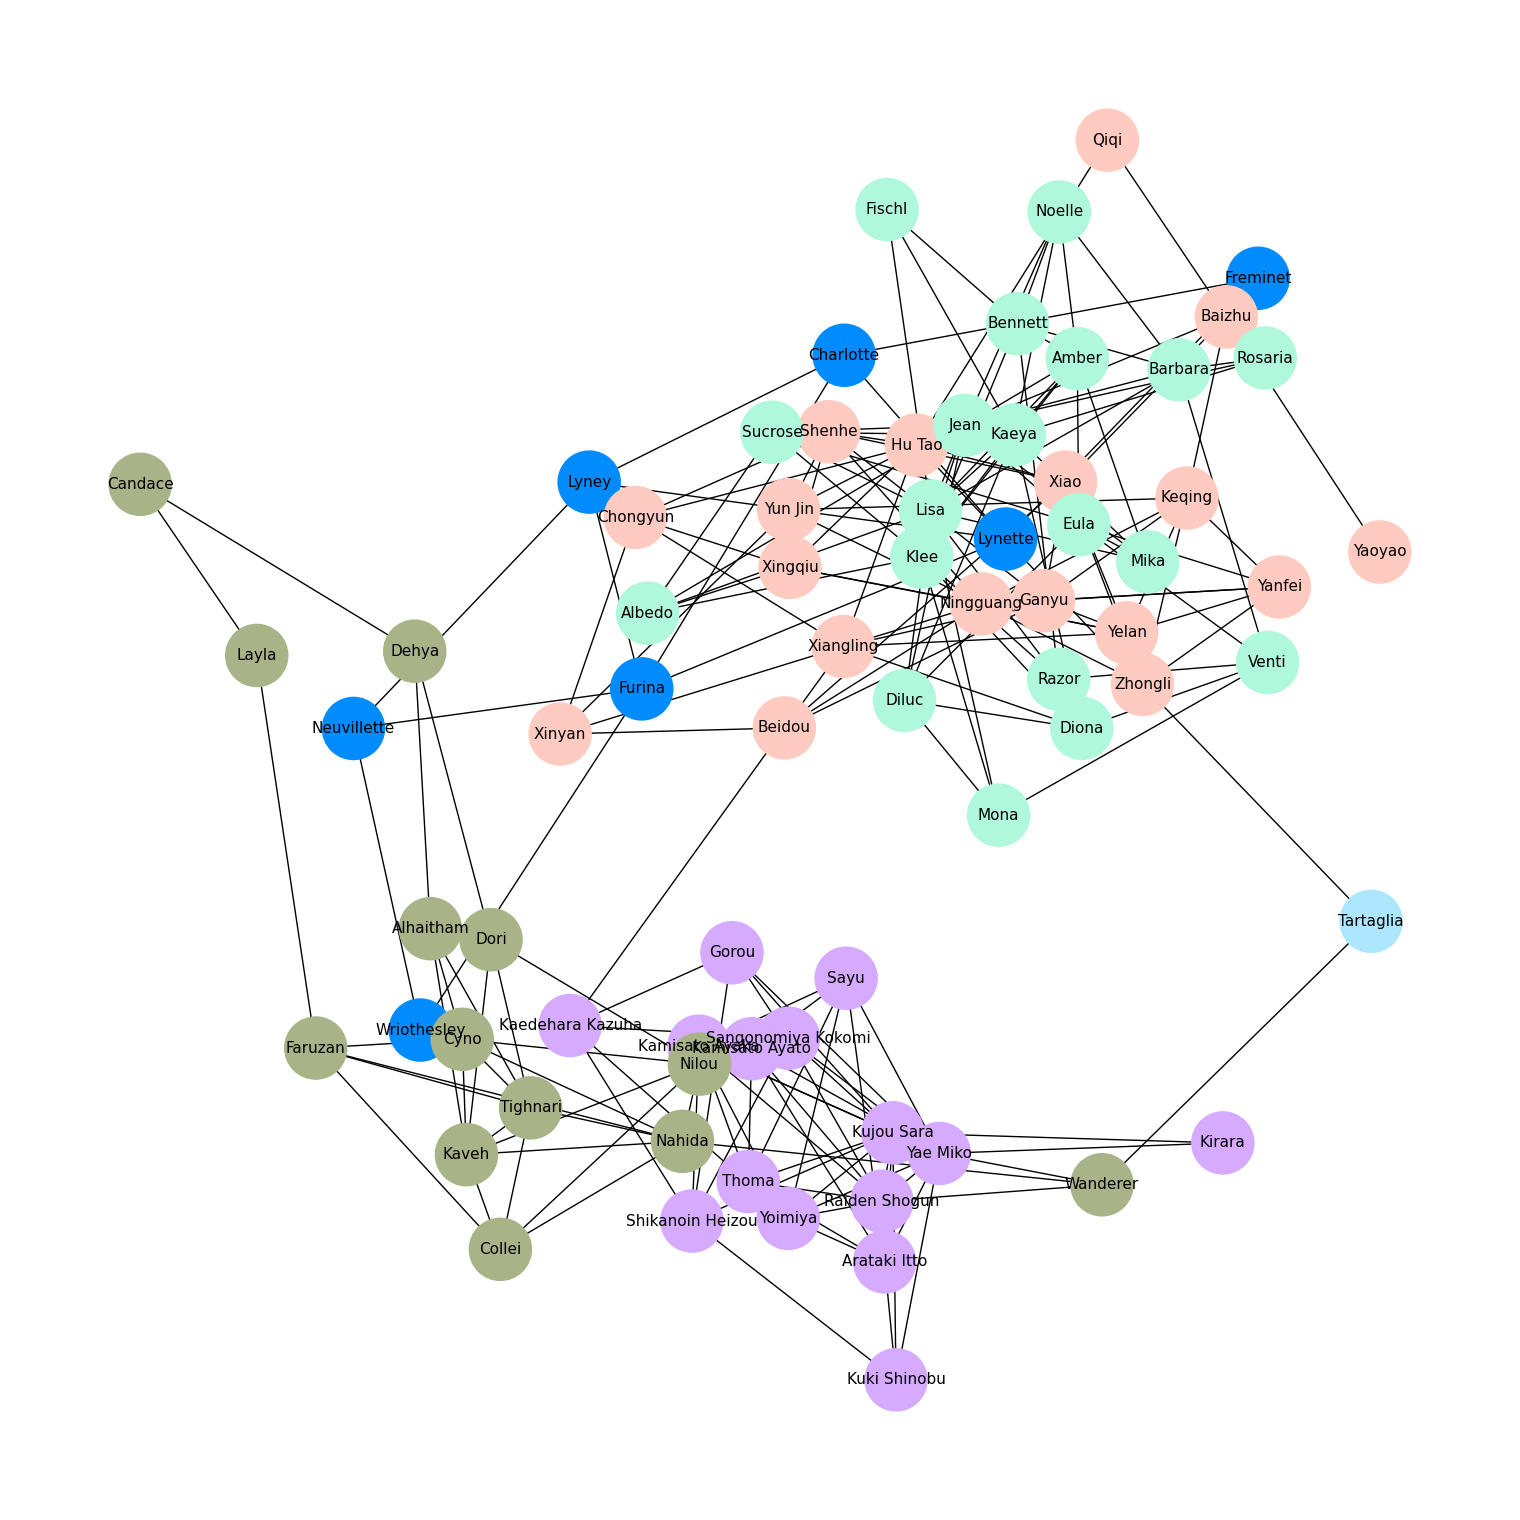

In [491]:
plt.figure(1,figsize=(15,15)) 
nx.draw(Graph, pos=pos, node_size=2000, node_color=node_colors, with_labels=True, font_size=11)

# uncomment line below to save drawing as an image
# plt.savefig("undirected_no_isolates.png", format="PNG")

In [492]:
Graph.number_of_nodes()

73

In [493]:
Graph.number_of_edges()

213

In [494]:
# initialise undirected network dataframe of characters
undir_df = dir_nodes_df[['id', 'nation']].copy()
undir_df = undir_df[~undir_df['id'].isin(isolates)]

In [495]:
undir_df['degree'] = undir_df['id'].apply(lambda n: len(Graph.edges(n)))
undir_df.sort_values('degree', ascending=False).head(50)

,id,nation,degree
10,Yae Miko,Inazuma,12
51,Lisa,Mondstadt,12
57,Jean,Mondstadt,12
20,Kujou ...,Inazuma,11
40,Kaeya,Mondstadt,11
28,Ningguang,Liyue,10
42,Klee,Mondstadt,10
9,Raiden...,Inazuma,9
32,Hu Tao,Liyue,9
7,Kamisa...,Inazuma,8


In [496]:
close_cen = nx.closeness_centrality(Graph)
# close_cen = dict(sorted(close_cen.items(), key=lambda item: item[1], reverse=True))
undir_df['closeness'] = undir_df['id'].apply(lambda node: close_cen[node])
undir_df.sort_values('closeness', ascending=False).head(10)

,id,nation,degree,closeness
25,Zhongli,Liyue,6,0.276795
28,Ningguang,Liyue,10,0.274208
24,Xiangling,Liyue,8,0.266730
26,Yanfei,Liyue,6,0.265523
59,Tartaglia,Snezhnaya,2,0.263142
30,Beidou,Liyue,6,0.260802
32,Hu Tao,Liyue,9,0.258505
31,Ganyu,Liyue,8,0.252933
23,Keqing,Liyue,7,0.251848
60,Wanderer,Sumeru,4,0.251848


In [497]:
# calcuate betweenness centrality for each character 
bet_cen = nx.betweenness_centrality(Graph)

undir_df['betweenness'] = undir_df['id'].apply(lambda node: bet_cen[node])
undir_df.sort_values('betweenness', ascending=False).head(10)

,id,nation,degree,closeness,betweenness
60,Wanderer,Sumeru,4,0.251848,0.286673
67,Nahida,Sumeru,7,0.213384,0.233007
25,Zhongli,Liyue,6,0.276795,0.222401
59,Tartaglia,Snezhnaya,2,0.263142,0.214685
30,Beidou,Liyue,6,0.260802,0.184120
8,Kaedeh...,Inazuma,5,0.249704,0.176519
26,Yanfei,Liyue,6,0.265523,0.147748
24,Xiangling,Liyue,8,0.266730,0.140335
45,Eula,Mondstadt,7,0.235665,0.136046
53,Diona,Mondstadt,5,0.236615,0.118304


In [498]:
# calculate each character's eigenvector centrality
eigen_cen = nx.eigenvector_centrality(Graph, max_iter= 10000)

undir_df['eigen'] = undir_df['id'].apply(lambda node: eigen_cen[node])
undir_df[['id','nation','degree','eigen']].sort_values('eigen', ascending=False).head(10)

,id,nation,degree,eigen
10,Yae Miko,Inazuma,12,0.371181
20,Kujou ...,Inazuma,11,0.355902
9,Raiden...,Inazuma,9,0.326390
12,Yoimiya,Inazuma,8,0.304709
7,Kamisa...,Inazuma,8,0.304384
16,Aratak...,Inazuma,8,0.302724
18,Thoma,Inazuma,7,0.276110
15,Kamisa...,Inazuma,6,0.242132
13,Sayu,Inazuma,6,0.239587
11,Sangon...,Inazuma,6,0.199766


In [499]:
# initialise ranking dataframe
ranked_df = undir_df[['id', 'nation']].copy()

In [500]:
undir_df = undir_df.sort_values('degree', ascending=False)
ranked_df['degree_rank'] = undir_df['degree'].rank(method='first', ascending=False).astype(int)

In [501]:
# add rank of characters based on different undirected network centrality values
undir_df = undir_df.sort_values('closeness', ascending=False)
ranked_df['closeness_rank'] = undir_df['closeness'].rank(method='first', ascending=False).astype(int)

undir_df = undir_df.sort_values('betweenness', ascending=False)
ranked_df['betweenness_rank'] = undir_df['betweenness'].rank(method='first', ascending=False).astype(int)

undir_df = undir_df.sort_values('eigen', ascending=False)
ranked_df['eigen_rank'] = undir_df['eigen'].rank(method='first', ascending=False).astype(int)

In [502]:
# add average rank column
ranked_df['average_rank'] = ranked_df.mean(numeric_only=True, axis=1)
ranked_df.sort_values('average_rank')

,id,nation,degree_rank,closeness_rank,betweenness_rank,eigen_rank,average_rank
10,Yae Miko,Inazuma,1,24,11,1,9.25
28,Ningguang,Liyue,6,2,14,24,11.50
12,Yoimiya,Inazuma,12,18,12,4,11.50
24,Xiangling,Liyue,11,3,8,31,13.25
9,Raiden...,Inazuma,8,25,19,3,13.75
30,Beidou,Liyue,32,6,5,18,15.25
32,Hu Tao,Liyue,9,7,13,40,17.25
57,Jean,Mondstadt,3,32,20,17,18.00
67,Nahida,Sumeru,18,30,2,23,18.25
45,Eula,Mondstadt,23,16,9,28,19.00


In [503]:
ranked_df

,id,nation,degree_rank,closeness_rank,betweenness_rank,eigen_rank,average_rank
0,Neuvil...,Fontaine,63,71,66,71,67.75
1,Wrioth...,Fontaine,68,72,69,73,70.50
2,Lyney,Fontaine,60,70,62,68,65.00
3,Lynette,Fontaine,59,68,59,70,64.00
4,Freminet,Fontaine,71,73,73,72,72.25
5,Furina,Fontaine,42,67,53,67,57.25
6,Charlotte,Fontaine,56,69,60,69,63.50
7,Kamisa...,Inazuma,10,37,44,5,24.00
8,Kaedeh...,Inazuma,45,12,6,14,19.25
9,Raiden...,Inazuma,8,25,19,3,13.75


In [504]:
import networkx as nx
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import torch
import torch.nn as nn
import torch.optim as optim

# Create a graph
G = nx.Graph()

# Add nodes
G.add_nodes_from([node["id"] for node in nodes])

# Add edges
G.add_edges_from([(edge["From"], edge["to"]) for edge in edges])

# Create a DataFrame for node features
node_features = pd.DataFrame(nodes)
node_features.set_index("id", inplace=True)

# Add graph-based features to the DataFrame
node_features["degree_rank"] = pd.Series(dict(nx.degree_centrality(G)))
node_features["closeness_rank"] = pd.Series(dict(nx.closeness_centrality(G)))
node_features["betweenness_rank"] = pd.Series(dict(nx.betweenness_centrality(G)))
node_features["eigen_rank"] = pd.Series(dict(nx.eigenvector_centrality(G)))
node_features["average_rank"] = node_features[["degree_rank", "closeness_rank", "betweenness_rank", "eigen_rank"]].mean(axis=1)

# Define the target variable (binary: important or not)
node_features["is_important"] = node_features["average_rank"].apply(lambda x: 1 if x > node_features["average_rank"].mean() else 0)

# Features for training
features = node_features[["degree_rank", "closeness_rank", "betweenness_rank", "eigen_rank", "average_rank"]]

# Target variable
target = node_features["is_important"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.FloatTensor(y_train.values).view(-1, 1)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_test_tensor = torch.FloatTensor(y_test.values).view(-1, 1)  # Define y_test_tensor here

# Define a simple neural network class
class SimpleNN(nn.Module):
    def __init__(self, input_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

# Instantiate the model
model = SimpleNN(input_size=X_train_tensor.shape[1])

In [505]:
# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
for epoch in range(10):
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

# Evaluate the model
with torch.no_grad():
    model.eval()
    outputs = model(X_test_tensor)
    predictions = (outputs > 0.5).float()
    accuracy = accuracy_score(y_test_tensor.numpy(), predictions.numpy())
    print(f"Accuracy: {accuracy * 100:.2f}%")

node_features["predicted_class"] = model(torch.FloatTensor(features.values)).detach().numpy()

Accuracy: 80.00%


In [506]:
# Display the DataFrame with predictions
from IPython.display import display
display(node_features)

#0 is not important
#1 is important

,nation,degree_rank,closeness_rank,betweenness_rank,eigen_rank,average_rank,is_important,predicted_class
id,,,,,,,,
Neuvillette,Fontaine,0.138889,0.500000,0.141107,0.051539,0.207884,1,0.533479
Wriothesley,Fontaine,0.055556,0.341232,0.000000,0.006353,0.100785,0,0.522574
Lyney,Fontaine,0.097222,0.360000,0.009064,0.012129,0.119604,0,0.523584
Lynette,Fontaine,0.069444,0.342857,0.000000,0.006913,0.104804,0,0.522625
Freminet,Fontaine,0.069444,0.342857,0.000000,0.006913,0.104804,0,0.522625
Furina,Fontaine,0.083333,0.344498,0.000196,0.007389,0.108854,0,0.522738
Charlotte,Fontaine,0.083333,0.344498,0.000196,0.007389,0.108854,0,0.522738
Kamisato Ayaka,Inazuma,0.138889,0.395604,0.001083,0.081866,0.154361,0,0.526146
Kaedehara Kazuha,Inazuma,0.166667,0.418605,0.013457,0.100470,0.174800,1,0.527847


In [507]:
pd.set_option('display.max_rows', None)

# Display the entire DataFrame
from IPython.display import display
display(node_features)
with pd.option_context('display.max_rows', None):
    print(node_features)

,nation,degree_rank,closeness_rank,betweenness_rank,eigen_rank,average_rank,is_important,predicted_class
id,,,,,,,,
Neuvillette,Fontaine,0.138889,0.500000,0.141107,0.051539,0.207884,1,0.533479
Wriothesley,Fontaine,0.055556,0.341232,0.000000,0.006353,0.100785,0,0.522574
Lyney,Fontaine,0.097222,0.360000,0.009064,0.012129,0.119604,0,0.523584
Lynette,Fontaine,0.069444,0.342857,0.000000,0.006913,0.104804,0,0.522625
Freminet,Fontaine,0.069444,0.342857,0.000000,0.006913,0.104804,0,0.522625
Furina,Fontaine,0.083333,0.344498,0.000196,0.007389,0.108854,0,0.522738
Charlotte,Fontaine,0.083333,0.344498,0.000196,0.007389,0.108854,0,0.522738
Kamisato Ayaka,Inazuma,0.138889,0.395604,0.001083,0.081866,0.154361,0,0.526146
Kaedehara Kazuha,Inazuma,0.166667,0.418605,0.013457,0.100470,0.174800,1,0.527847


               nation  degree_rank  closeness_rank  betweenness_rank  \
id                                                                     
Neuvill...   Fontaine   0.138889     0.500000        0.141107          
Wriothe...   Fontaine   0.055556     0.341232        0.000000          
Lyney        Fontaine   0.097222     0.360000        0.009064          
Lynette      Fontaine   0.069444     0.342857        0.000000          
Freminet     Fontaine   0.069444     0.342857        0.000000          
Furina       Fontaine   0.083333     0.344498        0.000196          
Charlotte    Fontaine   0.083333     0.344498        0.000196          
Kamisat...    Inazuma   0.138889     0.395604        0.001083          
Kaedeha...    Inazuma   0.166667     0.418605        0.013457          
Raiden ...    Inazuma   0.263889     0.537313        0.126230          
Yae Miko      Inazuma   0.208333     0.436364        0.018244          
Sangono...    Inazuma   0.097222     0.389189        0.001373   